### EIGENFACE MODEL
***

The dataset $X$ is composed by $M$ images of size $(m \times n)$

In [1]:
from PIL import Image, ImageEnhance
import os
import sklearn
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.linalg as la
import seaborn as sns
import pandas as pd
np.set_printoptions(suppress=True)

In [2]:
X, y_real, y_onpurpose = [], [], []
df_labels = pd.DataFrame({'targets' : ["NonDemented", "MildDemented", "ModerateDemented", "VeryMildDemented"],
                          'codes_real' : [0, 1, 2, 3],
                          'codes_onpurpose' : [0, 1, 1, 1]})
print(df_labels)

            targets  codes_real  codes_onpurpose
0       NonDemented           0                0
1      MildDemented           1                1
2  ModerateDemented           2                1
3  VeryMildDemented           3                1


In [3]:
for t in os.listdir('Alzheimer_data/'):
    if os.path.isdir('Alzheimer_data/'+t):
        for each_folder in os.listdir('Alzheimer_data/'+t+'/'):
            if os.path.isdir('Alzheimer_data/'+t+'/'+each_folder):
                print(t+"\t"+each_folder)
                condition = df_labels['targets'] == each_folder
                c_r = (df_labels[condition])['codes_real'].values[0]
                c_op = (df_labels[condition])['codes_onpurpose'].values[0]
                for f in os.listdir('Alzheimer_data/'+t+'/'+each_folder+'/'):
                    image = Image.open('Alzheimer_data/'+t+'/'+each_folder+'/'+f)
                    converter = ImageEnhance.Color(image)
                    image_processed = converter.enhance(4)
                    image_processed = image_processed.quantize(2)
                    img = np.asarray(image_processed)
                    X.append(img)
                    y_real.append(c_r)
                    y_onpurpose.append(c_op)

test	VeryMildDemented
test	ModerateDemented
test	MildDemented
test	NonDemented
train	VeryMildDemented
train	ModerateDemented
train	MildDemented
train	NonDemented


In [4]:
X, y = np.asarray(X), np.asarray(y_onpurpose)
print(X.shape,"\t", y.shape)

(6400, 208, 176) 	 (6400,)


In [5]:
h, w = np.shape(X)[1], np.shape(X)[2]

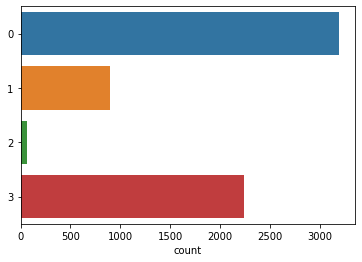

In [6]:
ax = sns.countplot(y=pd.Series(y_real))

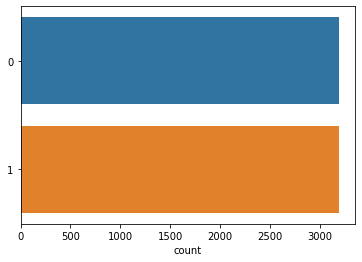

In [7]:
ax = sns.countplot(y=pd.Series(y_onpurpose))

Overview of the dataset

In [8]:
print("Dimension of Dataset \n\tX:\t{}\n\ty:\t{}".format(np.shape(X), np.shape(y)))
print("Number of samples (M): ",str(np.shape(X)[0]))
print("Dimension images\n\tHeight (m):\t{}\n\tWidth (n):\t{}".format(str(h),str(w)))

Dimension of Dataset 
	X:	(6400, 208, 176)
	y:	(6400,)
Number of samples (M):  6400
Dimension images
	Height (m):	208
	Width (n):	176


This is an example of the image

Real Class:  3 
On Purpose Class:  1


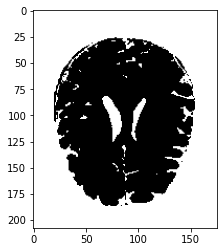

In [9]:
id = 0
example_image = X[id].reshape((h,w))
print("Real Class: ",y_real[id], "\nOn Purpose Class: ",y_onpurpose[id])
plt.imshow(example_image, cmap=plt.cm.gray)


Real Class:  0 
On Purpose Class:  0


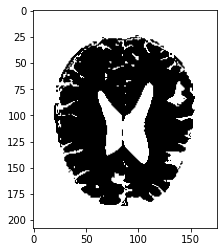

In [10]:
id2 = 1000
print("Real Class: ",y_real[id2], "\nOn Purpose Class: ",y_onpurpose[id2])
plt.imshow(X[id2].reshape((h,w)), cmap=plt.cm.gray)

Real Class:  1 
On Purpose Class:  1


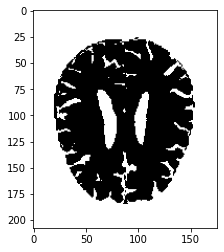

In [11]:
id3 = 500
print("Real Class: ",y_real[id3], "\nOn Purpose Class: ",y_onpurpose[id3])
plt.imshow(X[id3].reshape((h,w)), cmap=plt.cm.gray)

This is the matrix representation of the dataset

In [12]:
X = np.reshape(X, newshape=(np.shape(X)[0], h, w))
print("Dimension of Dataset: {}".format(np.shape(X)))

Dimension of Dataset: (6400, 208, 176)


Split dataset into train set (80%) and test set (20%)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onpurpose, test_size=0.3, random_state=42)
print("Shape of Train set\n\t Input: {}\tOutput: {}".format(np.shape(X_train), np.shape(y_train)))
print("Shape of Test set\n\t Input: {}\tOutput: {}".format(np.shape(X_test), np.shape(y_test)))

Shape of Train set
	 Input: (4480, 208, 176)	Output: (4480,)
Shape of Test set
	 Input: (1920, 208, 176)	Output: (1920,)


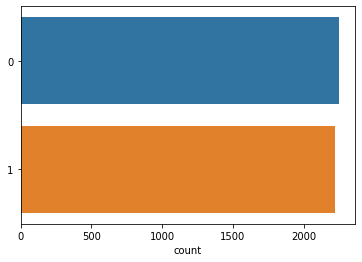

In [14]:
ax = sns.countplot(y=pd.Series(y_train))

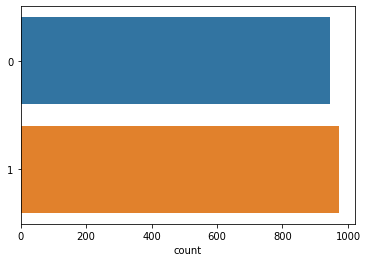

In [15]:
ax = sns.countplot(y=pd.Series(y_test))

This is the mean face image extracted by averaging all images of the training set <br>
$\hspace{6cm} \Psi = \frac{1}{M}\cdot\sum_{i=1}^{M} \Gamma_{i}$

(208, 176)


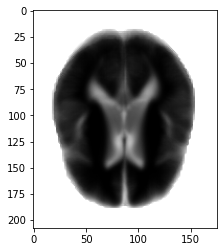

In [16]:
mean_face = X_train.mean(axis=0)
print(np.shape(mean_face))
plt.imshow(mean_face, cmap=plt.cm.gray)

This is the process of face's centering using the mean face <br>
$\phi_{i} = \Gamma_{i} - \Psi \hspace{1.5cm} (i= 1,\dots M)$

In [17]:
X_train_centered = X_train - mean_face
X_test_centered = X_test - mean_face
print("Shape of Centered Train set\t{}".format(np.shape(X_train_centered)))
print("Shape of Centered Test set\t{}".format(np.shape(X_test_centered)))

Shape of Centered Train set	(4480, 208, 176)
Shape of Centered Test set	(1920, 208, 176)


This is an example of the same face shown before (left) and the centered version (right)

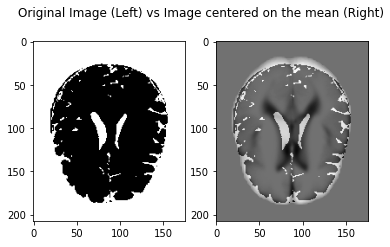

In [18]:
fig = plt.figure(facecolor=(1, 1, 1))
plt.title("Original Image (Left) vs Image centered on the mean (Right)")
plt.axis('off')
fig.add_subplot(1,2,1)
plt.imshow(example_image, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.imshow(example_image - mean_face, cmap=plt.cm.gray)
plt.show()

This is the vectorized version of the centered dataset <br>
Each image has been vectorized, in this sense:<br>
$\phi_{i} \in R^{(m \times n)} \longmapsto vec(\phi_{i}) \in R^{(m \cdot n)} \hspace{2cm} 
vec(\phi_{i}) = \begin{bmatrix}(\phi_{i})_{(\ast,1)}\\(\phi_{i})_{(\ast,2)}\\ \vdots \\(\phi_{i})_{(\ast,m \cdot n)}\end{bmatrix}$<br>
This is the vectorized version of the centered dataset:<br>
$X = [ \, vec(\phi_{i}), vec(\phi_{2}), \ldots , vec(\phi_{M}) ]\,$

In [19]:
X_train_centered_vectorized = np.reshape(X_train_centered, newshape=(np.shape(X_train_centered)[0], h*w))
print("\nShape of the Vectorized version of the Train centered dataset: {}\n"
      .format(np.shape(X_train_centered_vectorized)))
X_test_centered_vectorized = np.reshape(X_test_centered, newshape=(np.shape(X_test_centered)[0], h*w))
print("\nShape of the Vectorized version of the Test centered dataset: {}\n"
      .format(np.shape(X_test_centered_vectorized)))



Shape of the Vectorized version of the Train centered dataset: (4480, 36608)


Shape of the Vectorized version of the Test centered dataset: (1920, 36608)



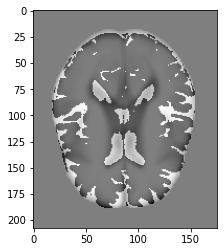

In [20]:
plt.imshow(np.reshape(X_train_centered_vectorized[id], newshape=(h,w)), cmap=plt.cm.gray)

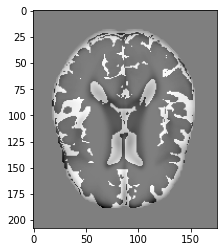

In [21]:
plt.imshow(np.reshape(X_test_centered_vectorized[id], newshape=(h,w)), cmap=plt.cm.gray)


Shape of the Transposed Vectorized version of the Train centered dataset: (36608, 4480)


Shape of the Transposed Vectorized version of the Test centered dataset: (36608, 1920)



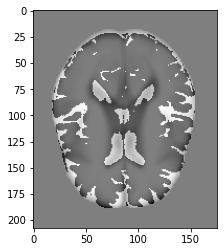

In [22]:
X_train_centered_vectorized = np.transpose(X_train_centered_vectorized)
print("\nShape of the Transposed Vectorized version of the Train centered dataset: {}\n"
      .format(np.shape(X_train_centered_vectorized)))
plt.imshow(np.reshape(X_train_centered_vectorized[:,id], newshape=(h,w)), cmap=plt.cm.gray)

X_test_centered_vectorized = np.transpose(X_test_centered_vectorized)
print("\nShape of the Transposed Vectorized version of the Test centered dataset: {}\n"
      .format(np.shape(X_test_centered_vectorized)))

Now is required to compute the PCA of the Covariance Matrix <br>
But since the features are situated on the rows 
($pixel_{1}$, $pixel_{2}$, $pixel_{3}$, ..., $pixel_{m*n}$) 
is required to change the perspective of the matrix and 
use the transpose of the matrix $X$ <br>
Now it's possible compute PCA using the Covariance Matrix computed on ${X_{c}}^{T}$<br>
$Cov_{X_{c}} = \frac{1}{M - 1} * {(X^{T})}^{T}X^{T} = \frac{1}{M - 1} * XX^{T}$ <br>
But the matrix product is performed using two matrices of these size: <br> $(m*n$ x $M)*(M$ x $m*n)$
<br> and so the resulting matrix has shape $(m*n$ x $m*n)$ which is very bigger and requires
an high computational effort.

In [23]:
print("X {} * X^T {}\nThe matrix product returns a matrix of size ({},{})"
      .format(np.shape(X_train_centered_vectorized),
              np.shape(np.transpose(X_train_centered_vectorized)),
              np.shape(X_train_centered_vectorized)[0],
              np.shape(X_train_centered_vectorized)[0]))

X (36608, 4480) * X^T (4480, 36608)
The matrix product returns a matrix of size (36608,36608)


Then it's used the transpose of the original matrix. <br>
$X \in R^{(mn \times M)} \rightarrow X^{T} \in R^{(M \times mn)}$ <br>
And so, when it's computed the Covariance matrix (with this formula $\downarrow$) 
it's obtained a matrix feasible to treat<br>
$Cov_{X_{c}} = \frac{1}{M - 1} * {X}^{T}X 
\Rightarrow
(M \times mn)*(mn \times M) 
\Rightarrow
(M \times M)
$

In [24]:
print("X^T {} * X {}".
      format(np.shape(X_train_centered_vectorized.T), 
      np.shape(X_train_centered_vectorized)))

Cov_XTX = (1/(np.shape(X_train_centered_vectorized)[0] - 1)) * \
          np.dot(np.transpose(X_train_centered_vectorized), X_train_centered_vectorized)
print("Dimension of the computed Covariance Matrix: {}".format(np.shape(Cov_XTX)))

X^T (4480, 36608) * X (36608, 4480)
Dimension of the computed Covariance Matrix: (4480, 4480)


Now let's call $v_{i}$ the eigenvectors of $X^{T}X$ and write the 
basic relation which tied up eigenvectors and eigenvalues:<br>
$(X^{T}X) \cdot v_{i} = \lambda_{i} \cdot v_{i} \iff 
X\cdot (X^{T}X) \cdot v_{i} = \lambda_{i} \cdot (X \cdot v_{i}) \iff$ <br><br>
$(XX^{T}) \cdot (X \cdot v_{i}) = \lambda_{i} \cdot (X \cdot v_{i}) \implies $<br><br>
$(X \cdot v_{i}) = u_{i} $ is the $i^{th}$ eigenvector of the matrix $(XX^{T})$
***
Then it has been computed the eigenvectors of the Covariance Matrix $X^{T}X$

In [25]:
eigenvalues, eigenvectors = np.linalg.eig(Cov_XTX)
print("Shape of the set of eigenvalues: {}".format(np.shape(eigenvalues)))
#print("These are the eigenvalues:\n{}".format(eigenvalues.astype(int)))
#print("The eigenvalues are ordered?\t{}".format(sorted(list(eigenvalues))==list(eigenvalues)))
print("Shape of the set of eigenvectors: {}".format(np.shape(eigenvectors)))
#print("These are the eigenvectors\n{}".format(eigenvectors))

Shape of the set of eigenvalues: (4480,)
Shape of the set of eigenvectors: (4480, 4480)


Using the eigenvectors $v_{i}$, 
now it can be computed the vectors $u_{i}$ also called EIGENFACES

Shape of the eigenfaces matrix: (36608, 4480)


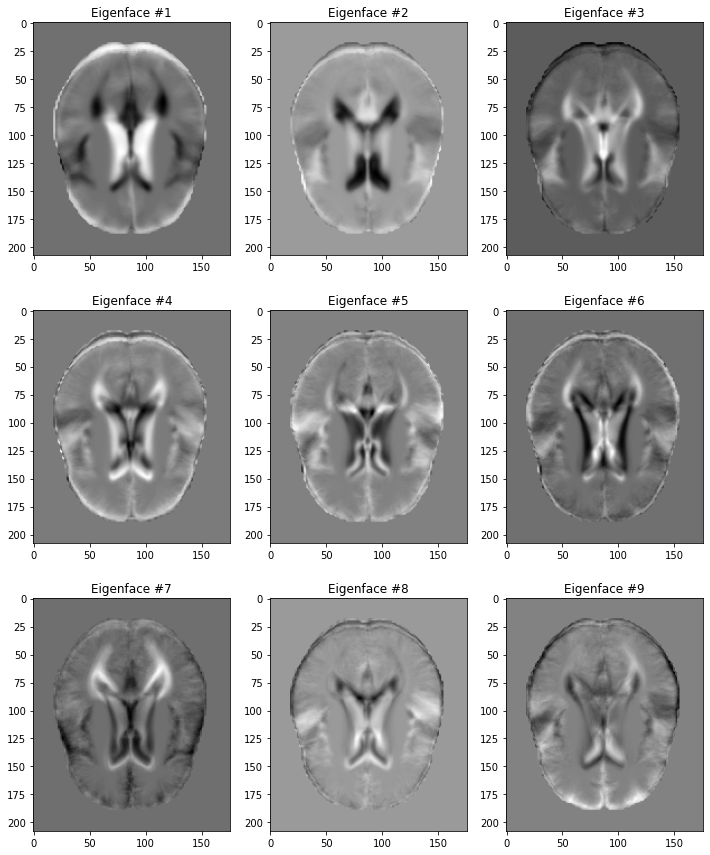

In [26]:
eigenfaces = np.dot(X_train_centered_vectorized, eigenvectors)
print("Shape of the eigenfaces matrix: {}".format(np.shape(eigenfaces)))
eigenface_example = np.reshape(eigenfaces[:,0], newshape=(h,w))
fig2 = plt.figure(figsize=(12,15),facecolor=(1, 1, 1))
plt.axis('off')
img=0
while img < 9:
    fig2.add_subplot(3,3,img+1)
    plt.title("Eigenface #{}".format(img+1))
    plt.imshow(np.reshape(eigenfaces[:,img], newshape=(h,w)), cmap=plt.cm.gray)
    img +=1
plt.show()

After the computing of the eigenfaces $u_{i}$, it must be chosen a number $M^{'}$ of eigenfaces, 
such that $M^{'} < M$.<br>
These eigenfaces has been chosen according to highest associated eigenvalues,
inspecting the cumulative explained variance (visually, inspect the scree plot)

In [27]:
total_variation = np.sum(eigenvalues)
explained_variance = np.asarray(
    [100*(i/total_variation) for i in sorted(eigenvalues, reverse=True)])
cumulative_covariance = np.cumsum(explained_variance)

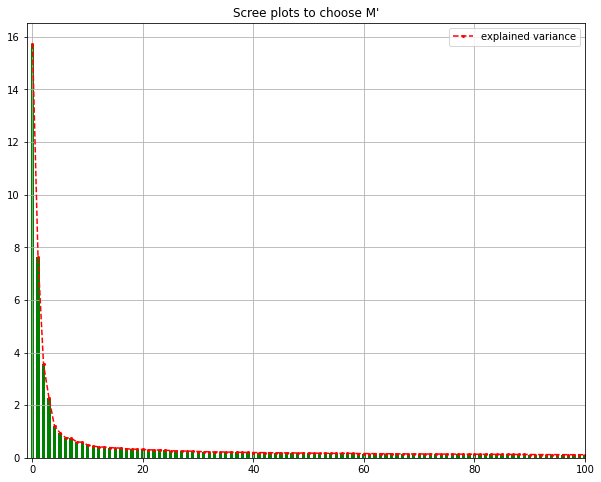

In [28]:
fig1 = plt.figure(1, figsize=(10,8))
plt.title("Scree plots to choose M\'")
plt.bar(x=np.arange(np.shape(explained_variance)[0]), 
        height=explained_variance, 
        width=0.6, color="green")
plt.plot(np.arange(np.shape(explained_variance)[0]), 
         explained_variance, 
         linestyle="--", marker="o", markersize=2,
         color="red", label="explained variance")
plt.xlim(-1,100)
#plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

In [29]:
m_first = 5

In [30]:
print("Cumulative Variance taking the first {} eigenfaces:\t{}"
      .format(m_first, cumulative_covariance[m_first-1:m_first][0]))

Cumulative Variance taking the first 5 eigenfaces:	30.38981025891938


In [31]:
basis_eigenfaces = eigenfaces[:,:m_first]

print(np.shape(basis_eigenfaces))
basis_eigenfaces_t = np.transpose(basis_eigenfaces)
print(np.shape(basis_eigenfaces_t))

(36608, 5)
(5, 36608)


In [32]:
# le colonne sono gli Omega vettori per ogni immagine del training set (colonna 1 = [w_11, w_12, ..., w_1M']^T)
projections_Omega = np.dot(basis_eigenfaces_t, X_train_centered_vectorized)
print(np.shape(projections_Omega), "\t\t", )


(5, 4480) 		


In [33]:

# la proiezione la ottengo pesando ogni eigenface (k) con il valore di w_k
proj = np.zeros((np.shape(basis_eigenfaces)[0],1))
for i in range(m_first):
    proj += projections_Omega[i:i+1,id]*basis_eigenfaces[:,i:i+1]
proj += mean_face.reshape((h*w,1))
print(np.shape(proj))

(36608, 1)


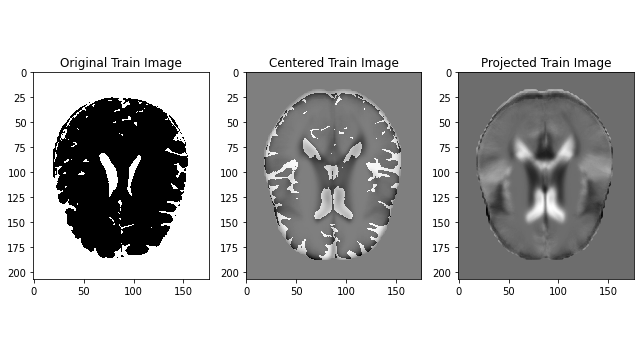

In [34]:
fig = plt.figure(figsize=(9,5), facecolor=(1, 1, 1))
#plt.title("Original (Left) vs Centered (Center) vs Proj into facespace (Right)")
plt.axis('off')
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Original Train Image')
plt.imshow(example_image, cmap=plt.cm.gray)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text('Centered Train Image')
plt.imshow(np.reshape(X_train_centered_vectorized[:,id], newshape=(h,w)), cmap=plt.cm.gray)
ax3 = fig.add_subplot(1,3,3)
ax3.title.set_text('Projected Train Image')
plt.imshow(proj.reshape((h,w)), cmap=plt.cm.gray)
fig.tight_layout(h_pad=2)
plt.show()


Per ogni classe ('Bush', 'Chavez', 'Blair', ...) creo un Omega medio 

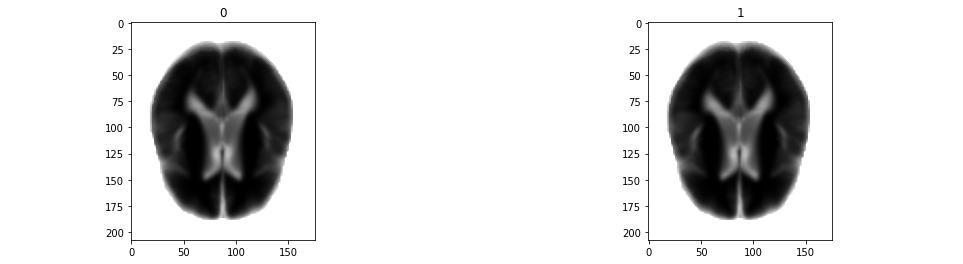

In [35]:
classes_index = {}

for count, name in enumerate(list(set(y_train))):
    classes_index[name] = np.where(y_train == count)

Omega_class = {}
c = 0
fig_compare = plt.figure(facecolor=(1, 1, 1), figsize=(17,4))
plt.axis('off')
for k,v in classes_index.items():
    output = np.zeros((m_first,))
    for each_index in v[0]:
        output += projections_Omega[:,each_index]
    
    output = np.reshape(output / len(v), newshape=(m_first,1))
    Omega_class[k] = output
    #print(k,"\n - Dimension Vector Class face:\t",np.shape(output), "\n - \t#Images:\t", np.shape(v)[1])
    proj_classface = np.zeros((np.shape(basis_eigenfaces)[0],1))
    for i in range(m_first):
        proj_classface += output[i:i+1,:]*basis_eigenfaces[:,i:i+1]
    proj_classface += mean_face.reshape((h*w,1))
    c+=1
    fig_compare.add_subplot(1,len(list(set(y_train))),c)
    plt.imshow(proj_classface.reshape((h,w)), cmap=plt.cm.gray)
    plt.title(k)
plt.show()


Per ogni immagine di test, proiettala nel subspace delle facce

In [36]:
n_test = np.shape(X_test_centered_vectorized)[1]

In [37]:
X_test_centered_vectorized, y_test = X_test_centered_vectorized[:,0:n_test], y_test[0:n_test]
print(np.shape(X_test_centered_vectorized))

(36608, 1920)


In [38]:
projections_Omega_test = np.dot(basis_eigenfaces_t, X_test_centered_vectorized)
print(np.shape(projections_Omega_test), "\t\t", )

(5, 1920) 		


In [ ]:
projections_test_set = np.zeros((np.shape(basis_eigenfaces)[0],n_test))
for i in range(0,n_test):
    proj_ts = np.zeros((np.shape(basis_eigenfaces)[0],1))
    for j in range(m_first):
        proj_ts += projections_Omega_test[j:j+1,i]*basis_eigenfaces[:,j:j+1]
    proj_ts += mean_face.reshape((h*w,1))
    projections_test_set[:,i:i+1] = np.reshape(proj_ts, newshape=(np.shape(proj_ts)[0],1))
print(np.shape(projections_test_set))

In [ ]:
fig4 = plt.figure(figsize=(9,5), facecolor=(1, 1, 1))
#plt.title("Original (Left) vs Centered (Center) vs Proj into facespace (Right)")
plt.axis('off')
ax1 = fig4.add_subplot(1,3,1)
ax1.title.set_text('Original Test Image')
plt.imshow(np.reshape(X_test[0], newshape=(h,w)), cmap=plt.cm.gray)
ax2 = fig4.add_subplot(1,3,2)
ax2.title.set_text('Centered Test Image')
plt.imshow(np.reshape(X_test_centered_vectorized[:,0], newshape=(h,w)), cmap=plt.cm.gray)
ax3 = fig4.add_subplot(1,3,3)
ax3.title.set_text('Projected Test Image')
plt.imshow(projections_test_set[:,0].reshape((h,w)), cmap=plt.cm.gray)
fig4.tight_layout(h_pad=2)
plt.show()

Calcola la distanza da ciascuna classe e se risulta essere minore di una soglia, allora etichetta
l'immagine come appartenente a quella classe

In [ ]:
from scipy.spatial import distance

In [ ]:
counters = [0, 0]
distances_test_set={}
for i in range(n_test):
    d_class = []
    d_space = 0
    for j in range(np.shape(projections_Omega)[1]):
        d_class.append(distance.euclidean(projections_Omega[:,j],projections_Omega_test[:,i]))
    d_space = (distance.euclidean(X_test_centered_vectorized[:,i], projections_test_set[:,i]))
    #print(d_class)
    id_min = np.argmin(d_class)
    #print("For test image {}: {}".format(i,d_class[id_min]))
    name_person = y_train[id_min]
    distances_test_set['Test #'+str(i)] = [d_class[id_min], d_space, name_person, y_test[i]]
    if (name_person == y_test[i]):
        counters[0] += 1
    else:
        counters[1] += 1
#for k,v in distances_test_set.items():
    #print(k,"\n - Real: {} \t Predicted: {}\n - Distance face space: {}".format(v[3], v[2], v[1]))

calcola la distanza dal face space

In [ ]:
print("Right: {}\nWrong: {}".format(counters[0], counters[1]))

In [ ]:
print("Percentage of success: {} % with {} eigenfaces over {} available"
      .format(round((counters[0]*100)/np.shape(X_test)[0],2), m_first, np.shape(eigenfaces)[1]))

### Codifica i 4 casi
